<h1 style='font-size: 35px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center; margin-bottom: 10px;'>Occupational Impact on Sleep and Stress</h1>

---

*In today's fast-paced world, work plays a major role in shaping our daily lives, influencing not just our schedules but also our overall well-being. One of the key areas where our occupations have a direct impact is sleep and stress levels. Different professions come with varying demands—some involve long hours, unpredictable shifts, or intense mental and physical exertion. These factors can affect how much rest we get, the quality of our sleep, and how we manage stress.*

*In this analysis, I aim to explore the relationship between different occupations and their impact on sleep duration, sleep quality, and stress levels. By looking at data from individuals in different professions, including software engineers and doctors, I want to uncover patterns that show how work affects rest and stress management. Additionally, I will consider other factors like physical activity, heart rate, and daily steps to get a more complete picture of overall health.*  

<h1 style='font-size: 25px; color: blue; font-family: Colonna MT; font-weight: 600'>Import Required Libraries</h1>

In [151]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from typing import List, Dict, Union, Optional, Tuple
from scipy.stats import skew, kurtosis, stats
from scipy.stats import pearsonr
from itertools import combinations
from dataclasses import dataclass
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
import seaborn as sns  
import pandas as pd 
import numpy as np 
import math  
import re 

import warnings  
warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 15) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h4 style='font-size: 25px; color: Blue; font-family: Colonna MT; font-weight: 600'>1.0: Import and Preprocessing Dataset</h4>

In [103]:
filepath = "Datasets/Sleep_health_and_lifestyle_dataset.csv"
df =pd.read_csv(filepath)
df.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
299,300,Female,51,Engineer,8.50,9,30,3,Normal,125/80,65,5000,NaN
362,363,Female,59,Nurse,8.20,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
210,211,Male,43,Engineer,7.70,8,90,5,Normal,130/85,70,8000,NaN
203,204,Male,43,Engineer,6.90,6,47,7,Normal Weight,117/76,69,6800,NaN
146,147,Male,39,Lawyer,7.20,8,60,5,Normal,130/85,68,8000,Insomnia
10,11,Male,29,Doctor,6.10,6,30,8,Normal,120/80,70,8000,NaN
229,230,Male,44,Salesperson,6.30,6,45,7,Overweight,130/85,72,6000,Insomnia
201,202,Male,43,Engineer,7.80,8,90,5,Normal,130/85,70,8000,Insomnia
228,229,Female,44,Teacher,6.60,7,45,4,Overweight,135/90,65,6000,Insomnia
309,310,Female,52,Accountant,6.60,7,45,7,Overweight,130/85,72,6000,Insomnia


<h4 style='font-size: 18px; color: blue; font-weight: 600'>1.2: Dataset Informations</h4>

In [41]:
df = df.drop(columns=['Person ID'])

In [42]:
df.shape

(374, 12)

In [43]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


<h4 style='font-size: 18px; color: blue;  font-weight: 600'>1.3: Columns Summary</h4>

To begin the analysis, it is important to explore the dataset by summarizing its structure and key attributes. This includes checking **data types** to determine numerical and categorical variables, assessing **unique values** to understand variability, and identifying **missing values** to ensure data completeness. Reviewing **non-null counts** helps in deciding whether preprocessing steps like imputation are needed. This step ensures a solid foundation for meaningful insights.

In [45]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Gender,object,0,374,2,"{'Male': 189, 'Female': 185}"
1,Age,int64,0,374,31,"{43: 34, 44: 30, 37: 20, 38: 20, 50: 20, 31: 18, 32: 17, 53: 17, 59: 16, 39: 15}"
2,Occupation,object,0,374,11,"{'Nurse': 73, 'Doctor': 71, 'Engineer': 63, 'Lawyer': 47, 'Teacher': 40, 'Accountant': 37, 'Salesperson': 32, 'Software Engineer': 4, 'Scientist': 4, 'Sales Representative': 2}"
3,Sleep Duration,float64,0,374,27,"{7.2: 36, 6.0: 31, 7.8: 28, 6.5: 26, 6.1: 25, 7.7: 24, 6.6: 20, 7.1: 19, 8.1: 15, 7.3: 14}"
4,Quality of Sleep,int64,0,374,6,"{8: 109, 6: 105, 7: 77, 9: 71, 5: 7, 4: 5}"
5,Physical Activity Level,int64,0,374,16,"{60: 70, 30: 68, 45: 68, 75: 67, 90: 67, 40: 6, 55: 6, 35: 4, 50: 4, 70: 3}"
6,Stress Level,int64,0,374,6,"{3: 71, 8: 70, 4: 70, 5: 67, 7: 50, 6: 46}"
7,BMI Category,object,0,374,4,"{'Normal': 195, 'Overweight': 148, 'Normal Weight': 21, 'Obese': 10}"
8,Blood Pressure,object,0,374,25,"{'130/85': 99, '140/95': 65, '125/80': 65, '120/80': 45, '115/75': 32, '135/90': 27, '140/90': 4, '125/82': 4, '132/87': 3, '128/85': 3}"
9,Heart Rate,int64,0,374,19,"{68: 94, 70: 76, 72: 69, 65: 67, 75: 36, 78: 5, 85: 3, 80: 3, 84: 2, 83: 2}"


<h4 style='font-size: 18px; color: Blue; font-weight: 600'>1.4: Checking Missing Values</h4>

*Identifying missing values is an essential step in data analysis to assess the dataset’s completeness and reliability. It involves pinpointing columns with null or empty entries, which could impact the accuracy of statistical and machine learning models.*

In [99]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Person ID,0,0.00
1,Gender,0,0.00
2,Age,0,0.00
3,Occupation,0,0.00
4,Sleep Duration,0,0.00
5,Quality of Sleep,0,0.00
6,Physical Activity Level,0,0.00
7,Stress Level,0,0.00
8,BMI Category,0,0.00
9,Blood Pressure,0,0.00


*In our dataset, the only column with missing values is the **Sleep Disorder** column, which has 219 missing entries, accounting for about 58.56% of the overall data. To address this, I will fill the missing values with the label 'None'*

In [104]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
Missig_values_info(df)

,index,Missing Values Counts,Proportions (%)
0,Person ID,0,0.00
1,Gender,0,0.00
2,Age,0,0.00
3,Occupation,0,0.00
4,Sleep Duration,0,0.00
5,Quality of Sleep,0,0.00
6,Physical Activity Level,0,0.00
7,Stress Level,0,0.00
8,BMI Category,0,0.00
9,Blood Pressure,0,0.00


<h4 style='font-size: 18px; color: blue;  font-weight: 600'>1.5: Exploring Invalid Entries Dtypes</h4>

Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [49]:
def column_entries(df):
    summary_data = []
    for col_name in df.columns:
        num_of_distinct_values = df[col_name].nunique()
        distinct_values_counts = df[col_name].value_counts().to_dict()
        summary_data.append({
            'col_name': col_name,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    summary_df = pd.DataFrame(summary_data)
    return summary_df
    

pd.set_option('display.max_colwidth', None)
column_entries = column_entries(df)
display(column_entries)

,col_name,num_of_distinct_values,distinct_values_counts
0,Gender,2,"{'Male': 189, 'Female': 185}"
1,Age,31,"{43: 34, 44: 30, 37: 20, 38: 20, 50: 20, 31: 18, 32: 17, 53: 17, 59: 16, 39: 15, 45: 14, 33: 13, 30: 13, 29: 13, 35: 12, 36: 12, 41: 12, 49: 11, 57: 9, 52: 9, 42: 9, 51: 8, 54: 7, 58: 6, 28: 5, 40: 4, 48: 3, 55: 2, 56: 2, 34: 2, 27: 1}"
2,Occupation,11,"{'Nurse': 73, 'Doctor': 71, 'Engineer': 63, 'Lawyer': 47, 'Teacher': 40, 'Accountant': 37, 'Salesperson': 32, 'Software Engineer': 4, 'Scientist': 4, 'Sales Representative': 2, 'Manager': 1}"
3,Sleep Duration,27,"{7.2: 36, 6.0: 31, 7.8: 28, 6.5: 26, 6.1: 25, 7.7: 24, 6.6: 20, 7.1: 19, 8.1: 15, 7.3: 14, 8.4: 14, 6.3: 13, 8.5: 13, 8.0: 13, 6.2: 12, 8.2: 11, 7.6: 10, 6.4: 9, 7.9: 7, 7.4: 5, 6.7: 5, 7.5: 5, 6.8: 5, 8.3: 5, 5.9: 4, 6.9: 3, 5.8: 2}"
4,Quality of Sleep,6,"{8: 109, 6: 105, 7: 77, 9: 71, 5: 7, 4: 5}"
5,Physical Activity Level,16,"{60: 70, 30: 68, 45: 68, 75: 67, 90: 67, 40: 6, 55: 6, 35: 4, 50: 4, 70: 3, 42: 2, 32: 2, 80: 2, 65: 2, 85: 2, 47: 1}"
6,Stress Level,6,"{3: 71, 8: 70, 4: 70, 5: 67, 7: 50, 6: 46}"
7,BMI Category,4,"{'Normal': 195, 'Overweight': 148, 'Normal Weight': 21, 'Obese': 10}"
8,Blood Pressure,25,"{'130/85': 99, '140/95': 65, '125/80': 65, '120/80': 45, '115/75': 32, '135/90': 27, '140/90': 4, '125/82': 4, '132/87': 3, '128/85': 3, '126/83': 2, '115/78': 2, '139/91': 2, '142/92': 2, '119/77': 2, '135/88': 2, '129/84': 2, '128/84': 2, '131/86': 2, '117/76': 2, '130/86': 2, '118/75': 2, '121/79': 1, '122/80': 1, '118/76': 1}"
9,Heart Rate,19,"{68: 94, 70: 76, 72: 69, 65: 67, 75: 36, 78: 5, 85: 3, 80: 3, 84: 2, 83: 2, 73: 2, 67: 2, 74: 2, 77: 2, 81: 2, 76: 2, 69: 2, 86: 2, 82: 1}"


In [50]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)


,Missing,String,Other,Datetime,Numeric
Gender,-,100.00%,-,-,-
Age,-,-,-,-,100.00%
Occupation,-,100.00%,-,-,-
Sleep Duration,-,-,-,-,100.00%
Quality of Sleep,-,-,-,-,100.00%
Physical Activity Level,-,-,-,-,100.00%
Stress Level,-,-,-,-,100.00%
BMI Category,-,100.00%,-,-,-
Blood Pressure,-,100.00%,-,-,-
Heart Rate,-,-,-,-,100.00%


<h4 style='font-size: 18px; color: Blue; font-weight: 600'>1.6: Handling Duplicates Values</h4>

In [51]:
df.duplicated().sum()

np.int64(242)

In [52]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

<h4 style='font-size:18px; color: Blue; font-weight: 600'>1.7: Renaming Columns</h4>

*When working with data, especially in statistical tests like ANOVA, column names with special characters or spaces can cause errors. To avoid this, we can clean the column names by converting them to lowercase, replacing any special characters (such as punctuation) with underscores, and ensuring there are no spaces. This makes the column names consistent and compatible with most analysis functions, preventing errors during data processing. The renaming process is automatic, making it easy to handle datasets with potentially problematic column names.*

In [223]:
import re

def rename(text):
    text = text.lower()                      
    text = re.sub(r'[^\w\s]', '_', text)
    text = re.sub(r' ', '_', text)
    return text

data = df.copy()
data.columns = df.columns.to_series().apply(rename)
data.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,age_group
373,374,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60
365,366,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60
358,359,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,None,46-60
359,360,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,None,46-60
360,361,Female,59,Nurse,8.20,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60


<h1 style='font-size: 25px; color: Red; font-weight: 600'>3.0: Statistical Description of the Datasets</h1>

*Let's take a moment to quickly explore some essential statistics of our dataset. By utilizing the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This summary includes important statistics such as the **mean**, **standard deviation**, **minimum**, **25th percentile (Q1)**, **median (50th percentile)**, **75th percentile (Q3)**, and **maximum** values. These metrics provide valuable insights into the general distribution and characteristics of the data, helping us identify patterns, outliers, and potential areas for further analysis.*

*For instance, looking at variables like **Sleep Duration**, **Stress Level**, and **Physical Activity Level**, we can understand the central tendency (mean), the spread of values (standard deviation), and the range of values within which most of the data falls (percentiles). This statistical summary serves as a foundation for deeper exploration and allows us to detect any anomalies or skewness in the dataset.*

In [53]:
summary_statistics = df.describe().T
summary_statistics.head(10)

,count,mean,std,min,25%,50%,75%,max
Age,132.00,41.13,8.81,27.00,33.75,41.00,49.00,59.00
Sleep Duration,132.00,7.08,0.78,5.80,6.40,7.15,7.72,8.50
Quality of Sleep,132.00,7.15,1.27,4.00,6.00,7.00,8.00,9.00
Physical Activity Level,132.00,58.39,20.47,30.00,44.25,60.00,75.00,90.00
Stress Level,132.00,5.54,1.74,3.00,4.00,6.00,7.00,8.00
Heart Rate,132.00,71.20,4.87,65.00,68.00,70.00,74.00,86.00
Daily Steps,132.00,6637.88,1766.29,3000.00,5000.00,7000.00,8000.00,10000.00


<h4 style='font-size: 18px; color: blue; font-weight: 600'>3.1:   Distribution of Continuous Variables</h4>

*To explore the distribution of continuous variables in this dataset, we examine key statistics like the **Mean**, **Median**, **Mode**, **Standard Deviation**, **Variance**, **Range**, **Skewness**, and **Kurtosis**. The **Mean** gives the average value, while the **Median** offers a more robust measure when outliers are present. The **Mode** highlights the most frequent value, and **Standard Deviation** along with **Variance** show how much data varies from the mean. The **Range** identifies the spread between the maximum and minimum values. **Skewness** indicates the symmetry of the distribution, and **Kurtosis** reveals the presence of outliers by analyzing the "tailedness" of the data. These metrics help us understand the overall distribution of continuous variables like **Sleep Duration** and **Stress Level**, and identify any potential data issues.*

In [19]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

Results = compute_overall_distribution_stats(df)
Results

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Person ID,187.50,187.50,1.00,108.11,11687.50,373.00,0.00,-1.20
1,Age,42.18,43.00,43.00,8.67,75.22,32.00,0.26,-0.91
2,Sleep Duration,7.13,7.20,7.20,0.80,0.63,2.70,0.04,-1.29
3,Quality of Sleep,7.31,7.00,8.00,1.20,1.43,5.00,-0.21,-0.75
4,Physical Activity Level,59.17,60.00,60.00,20.83,433.92,60.00,0.07,-1.27
5,Stress Level,5.39,5.00,3.00,1.77,3.15,5.00,0.15,-1.33
6,Heart Rate,70.17,70.00,68.00,4.14,17.10,21.00,1.22,2.24
7,Daily Steps,6816.84,7000.00,8000.00,1617.92,2617651.14,7000.00,0.18,-0.40


<h4 style='font-size: 18px; color: blue; font-weight: 600'>3.2: Comparing Variables Across Groups</h4>

*Next, we focus on comparing the means of variables like **Sleep Duration** and **Stress Level** across different groups (such as occupation or age). This comparison helps identify patterns or differences between groups, shedding light on how each variable behaves within specific categories. By analyzing these mean comparisons, we gain insights into the relationships between variables and their respective groups, which can guide further analysis and decision-making in understanding factors influencing sleep and stress.*

In [20]:
def summary_stats(df, Metrics, group=None):
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

Metrics = df.select_dtypes(include=np.number).columns.tolist()
Results = summary_stats(df, Metrics, group='Occupation')
Results

,Occupation,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,Accountant,153.05 ± 11.93,39.62 ± 0.93,7.11 ± 0.05,7.89 ± 0.08,58.11 ± 1.28,4.59 ± 0.20,68.86 ± 0.30,6881.08 ± 67.99
1,Doctor,64.06 ± 8.85,32.68 ± 0.70,6.97 ± 0.10,6.65 ± 0.09,55.35 ± 2.72,6.73 ± 0.16,71.52 ± 0.42,6808.45 ± 209.28
2,Engineer,245.92 ± 11.17,46.59 ± 0.88,7.99 ± 0.06,8.41 ± 0.10,51.86 ± 3.23,3.89 ± 0.14,67.19 ± 0.40,5980.95 ± 174.03
3,Lawyer,153.89 ± 3.18,39.43 ± 0.25,7.41 ± 0.04,7.89 ± 0.05,70.43 ± 2.19,5.06 ± 0.04,69.64 ± 0.49,7661.70 ± 156.65
4,Manager,264.00 ± nan,45.00 ± nan,6.90 ± nan,7.00 ± nan,55.00 ± nan,5.00 ± nan,75.00 ± nan,5500.00 ± nan
5,Nurse,295.85 ± 10.37,51.79 ± 0.91,7.06 ± 0.12,7.37 ± 0.18,78.59 ± 1.61,5.55 ± 0.28,72.00 ± 0.44,8057.53 ± 222.01
6,Sales Representative,4.50 ± 0.50,28.00 ± 0.00,5.90 ± 0.00,4.00 ± 0.00,30.00 ± 0.00,8.00 ± 0.00,85.00 ± 0.00,3000.00 ± 0.00
7,Salesperson,218.38 ± 3.91,43.53 ± 0.10,6.40 ± 0.02,6.00 ± 0.00,45.00 ± 0.00,7.00 ± 0.00,72.00 ± 0.00,6000.00 ± 0.00
8,Scientist,75.50 ± 3.48,33.50 ± 0.29,6.00 ± 0.12,5.00 ± 0.58,41.00 ± 5.20,7.00 ± 0.58,78.50 ± 1.44,5350.00 ± 86.60
9,Software Engineer,46.25 ± 24.76,31.25 ± 2.17,6.75 ± 0.43,6.50 ± 0.96,48.00 ± 7.35,6.00 ± 0.71,75.50 ± 3.57,5800.00 ± 1293.57


<h4 style='font-size: 18px; color: Blue; font-weight: 600'>3.3: Distributions of Categorical Variables</h4>

*Now, we explore the counts and proportions of categorical variables in the dataset, such as **Gender** and **Sleep Disorder**. The **counts** indicate how many times each category appears, providing insight into the distribution of data within each variable. **Proportions** show the relative frequency of each category, helping us understand the balance or imbalance in the dataset. By analyzing these distributions across different groups, we can uncover patterns or relationships that are crucial for further analysis, offering a deeper understanding of the structure and distribution of categorical variables in relation to other factors like sleep and stress levels.*

In [21]:
def Distributions_of_Categorical_Variables(df, categories):
    data = []
    for category in categories:
        counts = df[category].value_counts()
        proportions = df[category].value_counts(normalize=True)
        for value, count in counts.items():
            proportion = proportions[value]
            data.append({
                'Category': category,
                'Value': value,
                'Count': count,
                'Proportion': f"{proportion:.2%}" 
            })
    
    result_df = pd.DataFrame(data)
    return result_df
categorical_variables = df.select_dtypes(include=['object']).columns
Results = Distributions_of_Categorical_Variables(df, categorical_variables)
Results.head(10)

,Category,Value,Count,Proportion
0,Gender,Male,189,50.53%
1,Gender,Female,185,49.47%
2,Occupation,Nurse,73,19.52%
3,Occupation,Doctor,71,18.98%
4,Occupation,Engineer,63,16.84%
5,Occupation,Lawyer,47,12.57%
6,Occupation,Teacher,40,10.70%
7,Occupation,Accountant,37,9.89%
8,Occupation,Salesperson,32,8.56%
9,Occupation,Software Engineer,4,1.07%


*To gain a more intuitive understanding of the dataset, let's explore how different categorical variables are distributed across a single category. For example, we can examine how **Gender**, **BMI Category**, **Blood Pressure**, and **Sleep Disorder** are distributed across **Occupation**. By doing this, we can identify how these variables vary within each occupation category, revealing potential patterns or trends that might be specific to certain occupations. This approach helps us see the relationships between different categorical variables and occupation, offering a clearer understanding of how these factors interact in the dataset.*

In [22]:
def Distributions_of_Categorical_Variables_with_others(df, group_column, categories):
    data = []
    for category in categories:
        if category == group_column:
            continue
        
        grouped = df.groupby(group_column)[category].value_counts(normalize=False)
        grouped_proportions = df.groupby(group_column)[category].value_counts(normalize=True)
        for group, values in grouped.groupby(level=0):
            for (g, value), count in values.items():
                proportion = grouped_proportions[(group, value)]
                
                data.append({
                    'Main-Group': group_column,
                    'Sub-Group': group,
                    'Category': category,
                    'Value': value,
                    'Count': count,
                    'Proportion': f"{proportion:.2%}"
                })
    result_df = pd.DataFrame(data)
    return result_df

categorical_variables = df.select_dtypes(include=['object']).columns
group_column = 'Occupation'
Results = Distributions_of_Categorical_Variables_with_others(df, group_column, categorical_variables)
Results.head(10)

,Main-Group,Sub-Group,Category,Value,Count,Proportion
0,Occupation,Accountant,Gender,Female,36,97.30%
1,Occupation,Accountant,Gender,Male,1,2.70%
2,Occupation,Doctor,Gender,Male,69,97.18%
3,Occupation,Doctor,Gender,Female,2,2.82%
4,Occupation,Engineer,Gender,Female,32,50.79%
5,Occupation,Engineer,Gender,Male,31,49.21%
6,Occupation,Lawyer,Gender,Male,45,95.74%
7,Occupation,Lawyer,Gender,Female,2,4.26%
8,Occupation,Manager,Gender,Female,1,100.00%
9,Occupation,Nurse,Gender,Female,73,100.00%


<h1 style='font-size: 20px; color: Red; font-weight: 600'>4.0: Exploration of Data Distribution (Visualizations)</h1>

*To gain more intuitive insights, let's visualize the data distribution using tools like histograms, box plots, and scatter plots. These visualizations help us easily identify patterns, trends, and outliers, providing a clearer representation of how data is spread across variables. By doing so, we can quickly interpret and gain a deeper understanding of the dataset's structure and the relationships between different variables.*

<h4 style='font-size: 17px; color: blue; font-weight: 600'>4.1: Histogram (Frequency Distributions)</h4>

*A histogram is a great tool for visualizing data distribution. It displays the frequency of data points within specific intervals or bins, helping us understand the shape, spread, and central tendency of the data. By examining the histogram, we can easily identify patterns like skewness, outliers, or whether the data follows a normal distribution, making it an essential starting point for exploring continuous variables.*

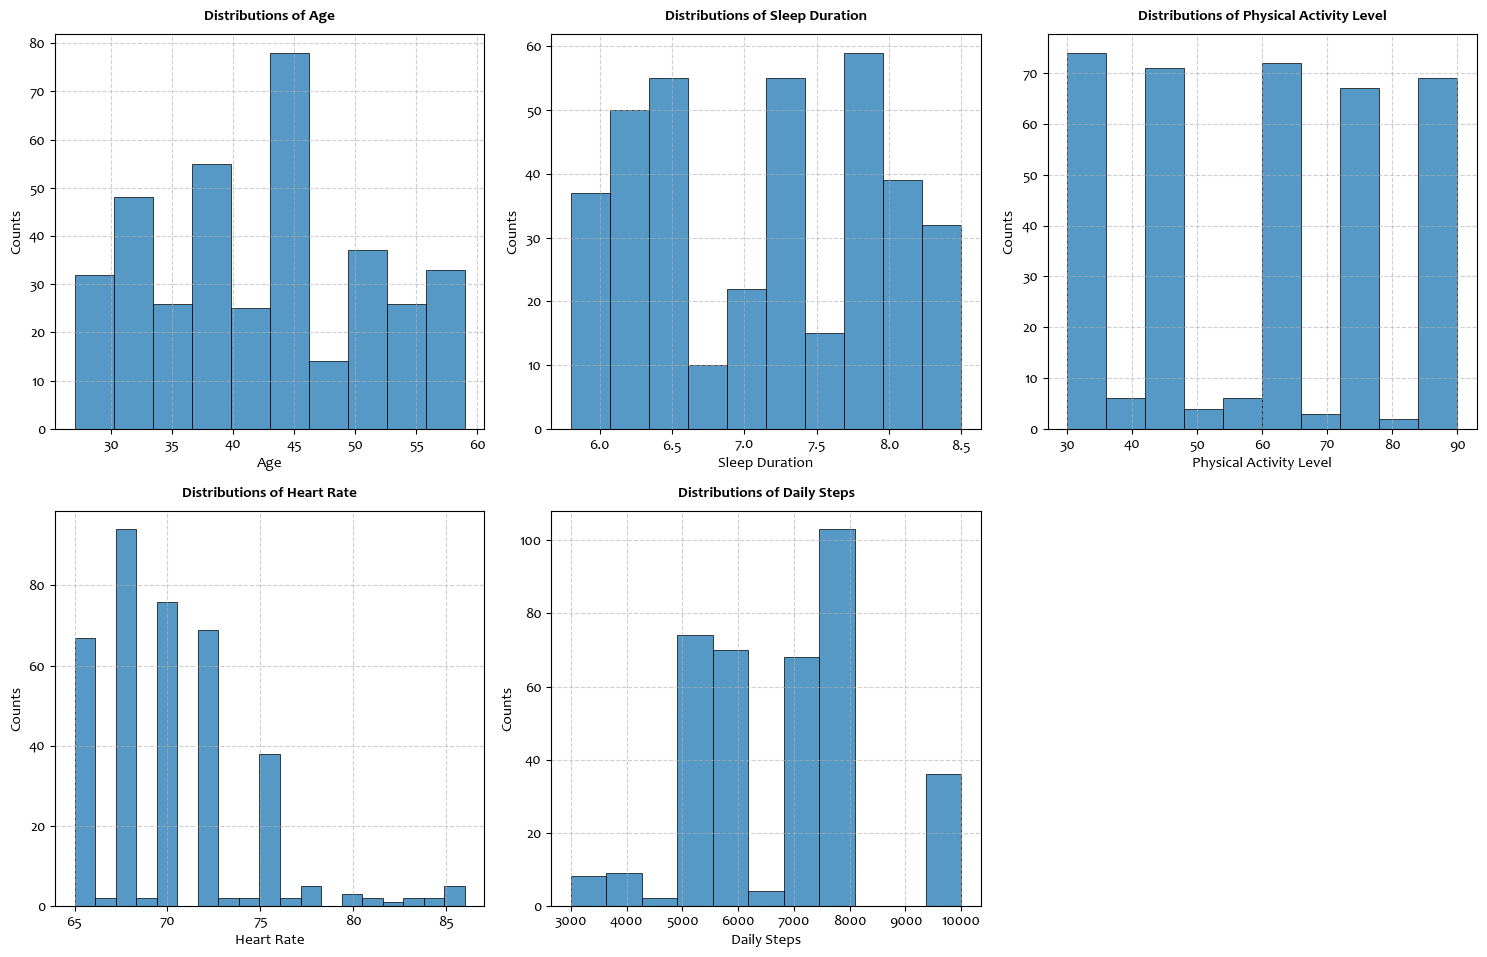

In [25]:
Metrics = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 3)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    sns.histplot(data=df, x=df[column], fill=True, ax=axes[idx], linewidth=0.5)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h4 style='font-size: 17px; color: blue; font-weight: 600'>4.2: Boxplot (Distributions Comparisons, and Outlier Detections)</h4>

In this analysis, a **boxplot** is a useful tool for exploring the distribution and detecting outliers across different groups. It visually represents the **median**, **quartiles**, and potential **outliers** within the data, giving us insights into the spread and variability of values. By comparing boxplots across groups (such as different occupations), we can observe how data like **Sleep Duration** or **Stress Levels** are distributed and whether there are significant differences between groups. Outliers are easily identified as points outside the "whiskers" of the boxplot, helping us spot any extreme values. This visualization aids in understanding both the central tendency and the variability within the dataset.

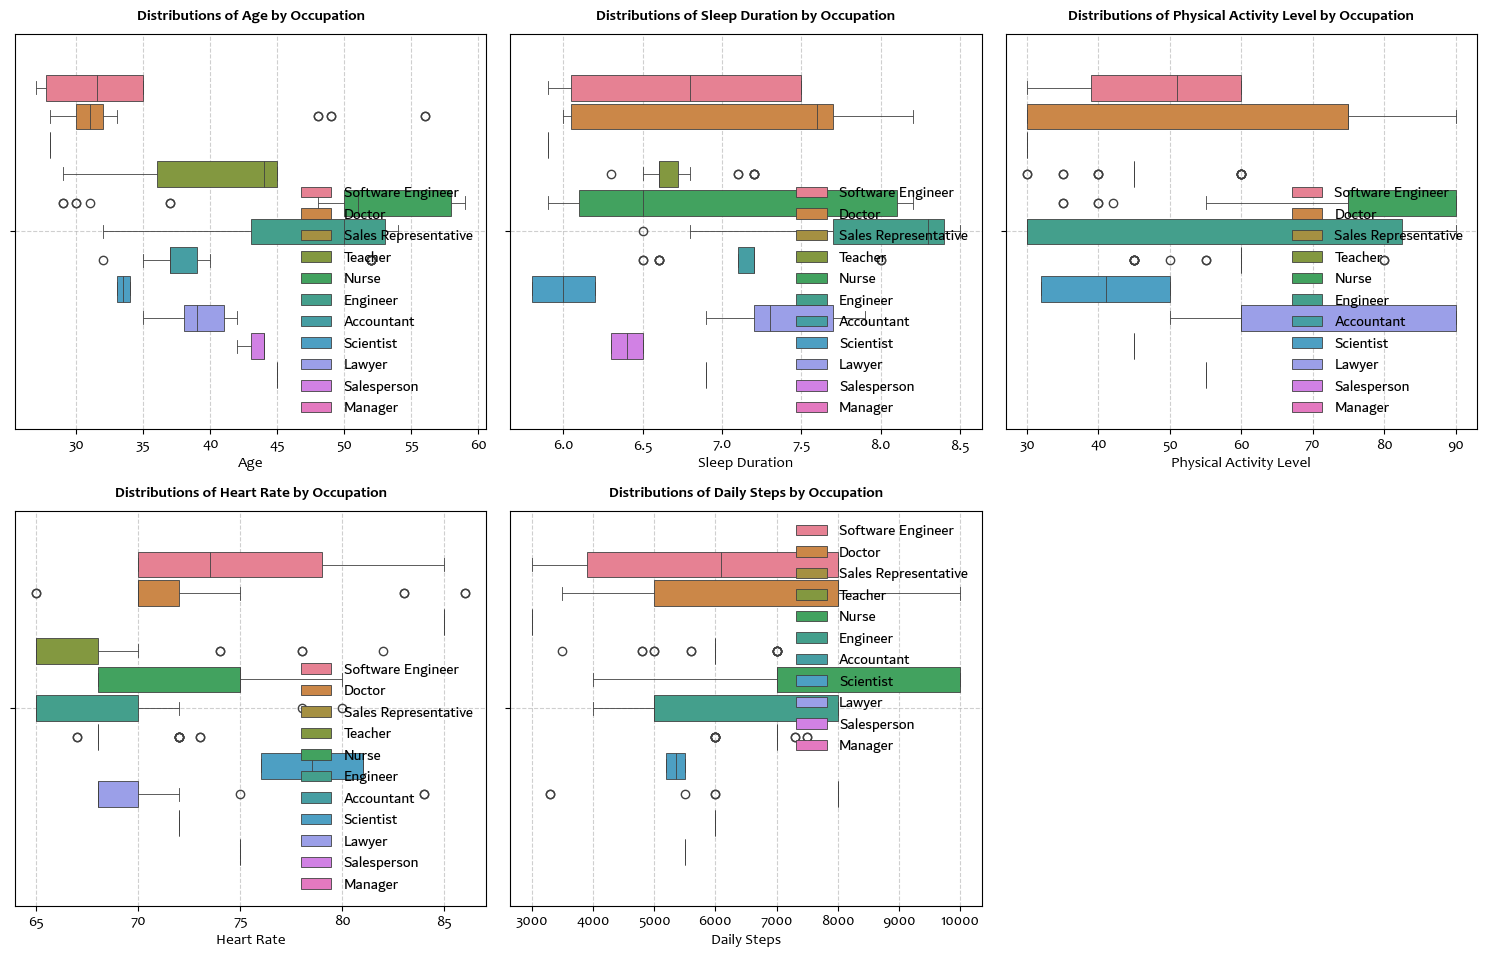

In [26]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 3)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx], hue ='Occupation', linewidth=0.6)   
    axes[idx].set_title(f"Distributions of {column} by Occupation", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)
    axes[idx].legend(frameon=False)
    
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h4 style='font-size: 17px; color: blue; font-weight: 600'>4.3. Kernel Density Estimate (KDE) Plot</h4>

Let's use a Kernel Density Estimate (KDE) plot to get a smoother distribution of the data. The KDE plot provides a continuous, smoothed version of the data distribution, which helps us better understand the underlying patterns and density of the data. Unlike histograms, which bin data into discrete intervals, KDE estimates the probability density function, giving us a clearer view of the distribution, identifying peaks, and allowing for easier comparison between variables or groups. This plot is especially useful for visualizing the shape of the data and detecting any subtle trends or differences that may not be as apparent in other visualizations.

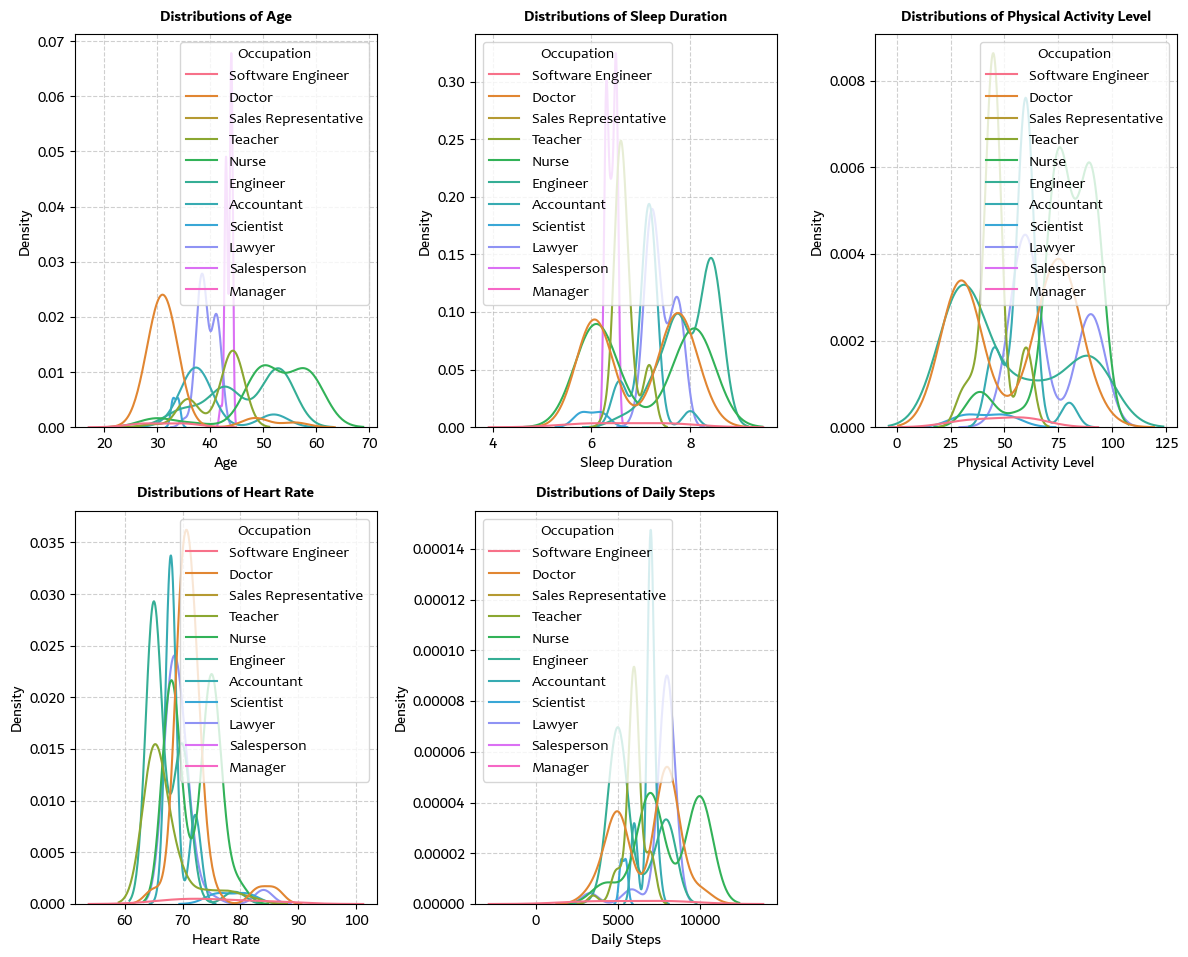

In [27]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 3)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 5*rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    sns.kdeplot(data=df, x=df[column], fill=False, hue='Occupation', ax=axes[idx])   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h4 style='font-size: 17px; color: blue; font-weight: 600'>4.4. Distribution of Categorical Variables using Countplot</h4>

To explore the distribution of categorical variables in our dataset, we will use countplots, which provide a clear visual representation of the frequency of each category. Countplots help us identify imbalances, trends, and potential patterns in variables such as smoking habits, gender, symptoms, and chronic disease presence. By visualizing these distributions, we can gain insights into the data structure, detect anomalies, and make informed preprocessing decisions for our machine learning model.

In [30]:
#categorical_vars = df.select_dtypes(include=['object']).columns


Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')

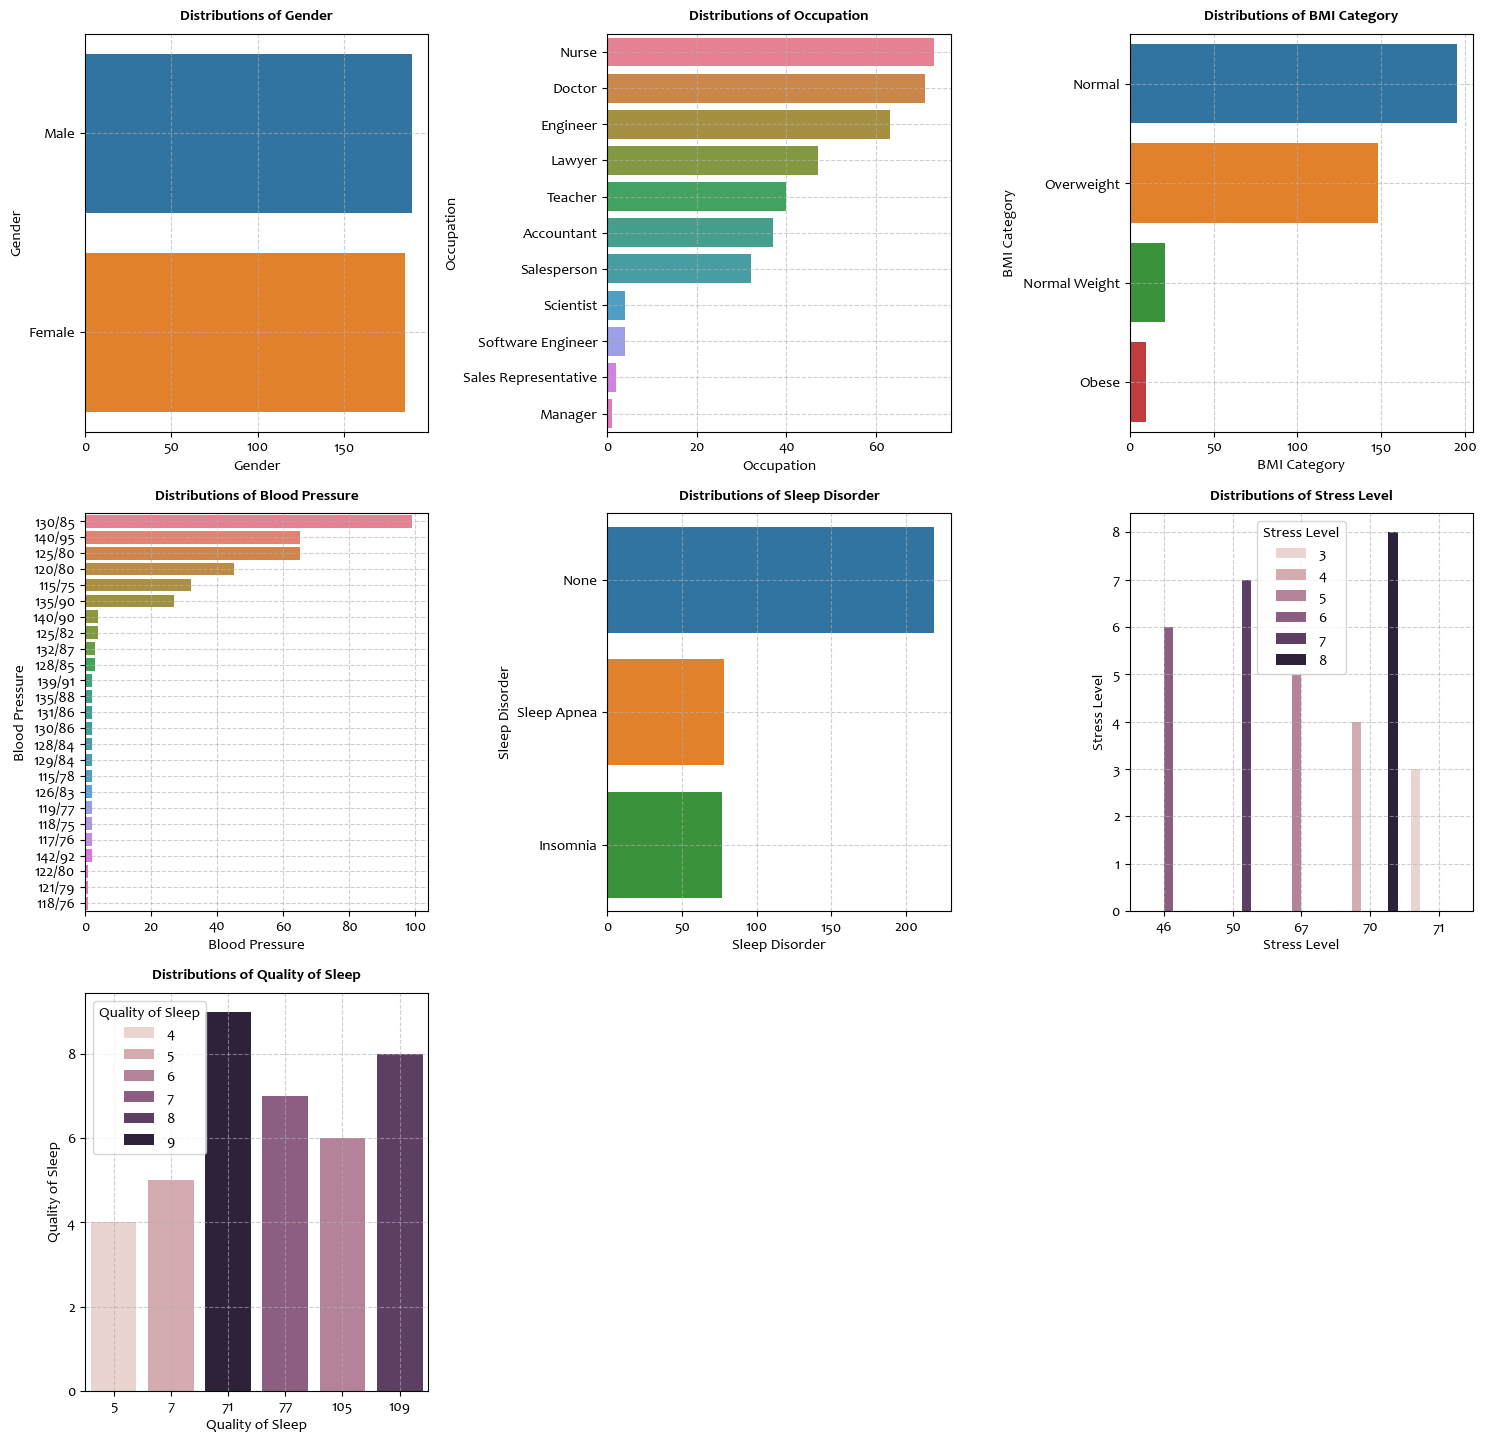

In [32]:
#categorical_vars = df.select_dtypes(include=['object']).columns
categorical_vars = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder', 'Stress Level', 'Quality of Sleep']

num_variables = len(categorical_vars)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 3)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(categorical_vars):
    column_data = df.groupby(column).size().reset_index(name='Counts').sort_values(by='Counts', ascending=False)
    sns.barplot(data=column_data, y=column_data[column], x=column_data['Counts'], fill=True, ax=axes[idx], hue=column, linewidth=0.5)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

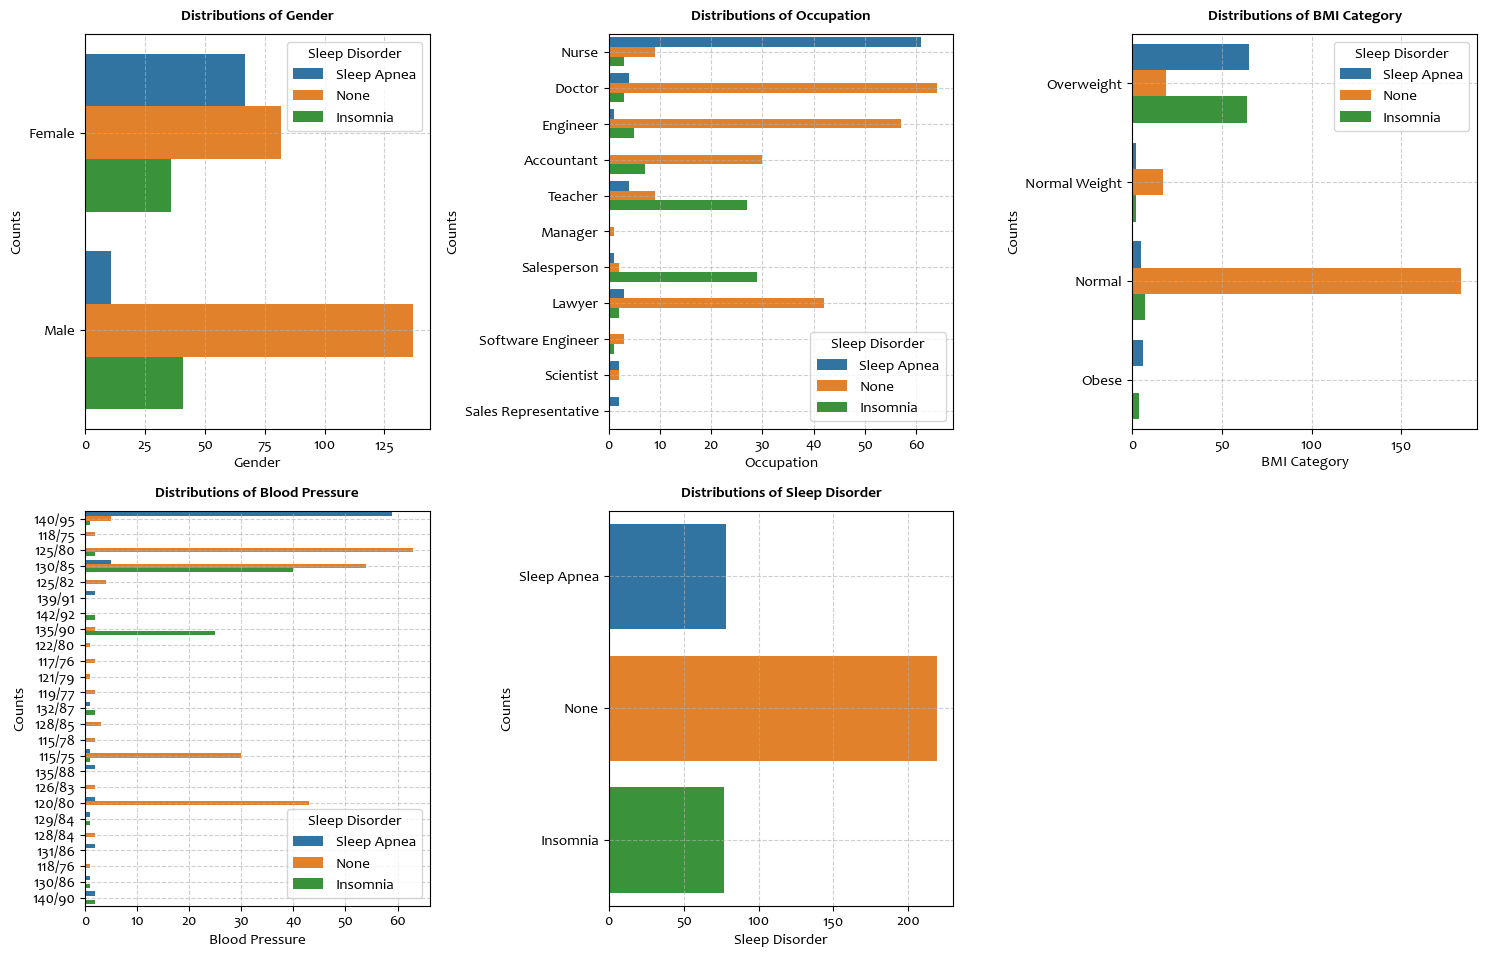

In [231]:
categorical_vars = df.select_dtypes(include=['object']).columns

num_variables = len(categorical_vars)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 3)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(categorical_vars):
    sns.countplot(data=df, y=df[column], fill=True, ax=axes[idx], hue='Sleep Disorder', linewidth=0.5)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

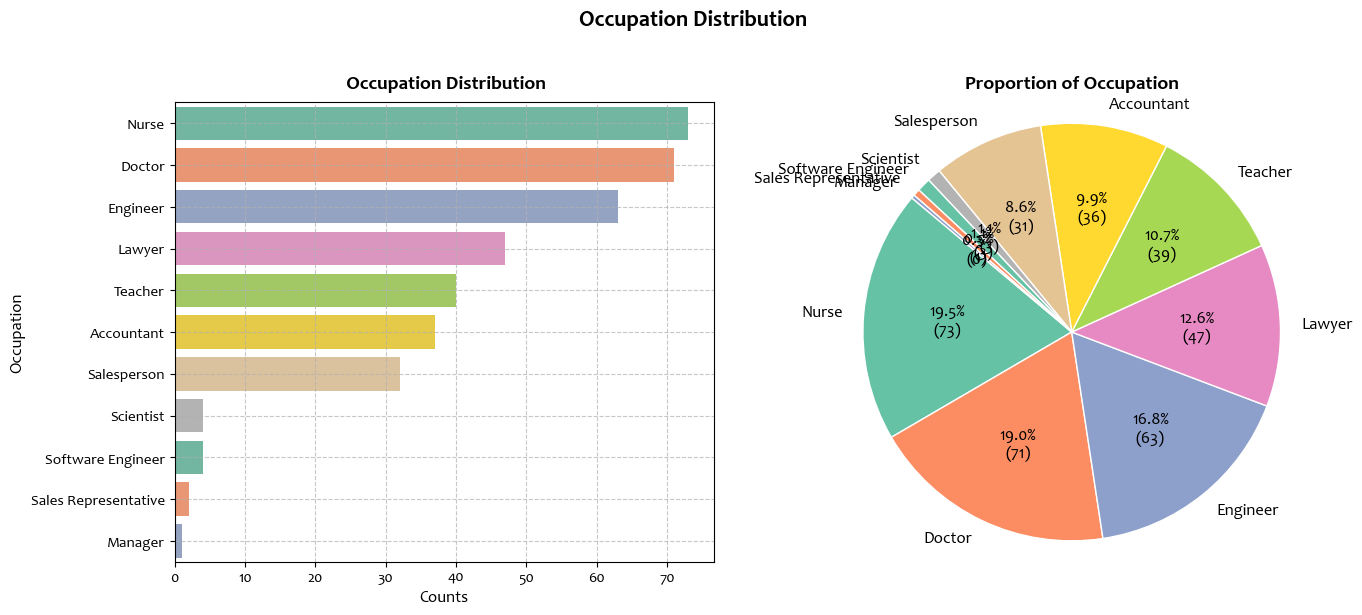

In [34]:
def Cagorical_varible_distplot(df, categorical_column, title, figsize=(14, 6), save_path=None, dpi=300):
    counts_df = df.groupby(categorical_column).size().reset_index(name='Counts').sort_values(by='Counts', ascending=False)
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    
    palette = sns.color_palette("Set2", len(counts_df))
    sns.barplot(data=counts_df, y=categorical_column, x='Counts', hue=categorical_column, dodge=False, alpha=1, palette=palette, ax=axes[0])
    axes[0].set_title(f" {categorical_column} Distribution", fontsize=14, fontweight='bold', pad=10)
    axes[0].set_xlabel("Counts", fontsize=12)
    axes[0].set_ylabel(categorical_column, fontsize=12)
    axes[0].grid(True, linestyle="--", alpha=0.7)
    
    axes[1].pie(counts_df['Counts'], labels=counts_df[categorical_column],
                autopct=lambda p: f"{p:.1f}%\n({int(p/100 * sum(counts_df['Counts'])):,})",
                colors=palette, startangle=140, textprops={'fontsize': 12},
                wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    axes[1].set_title(f"Proportion of {categorical_column}", fontsize=14, fontweight='bold', pad=10)
    axes[1].axis('equal')
    plt.tight_layout()
    if save_path: plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    plt.show()

Cagorical_varible_distplot(df, categorical_column='Occupation', title='Occupation Distribution')

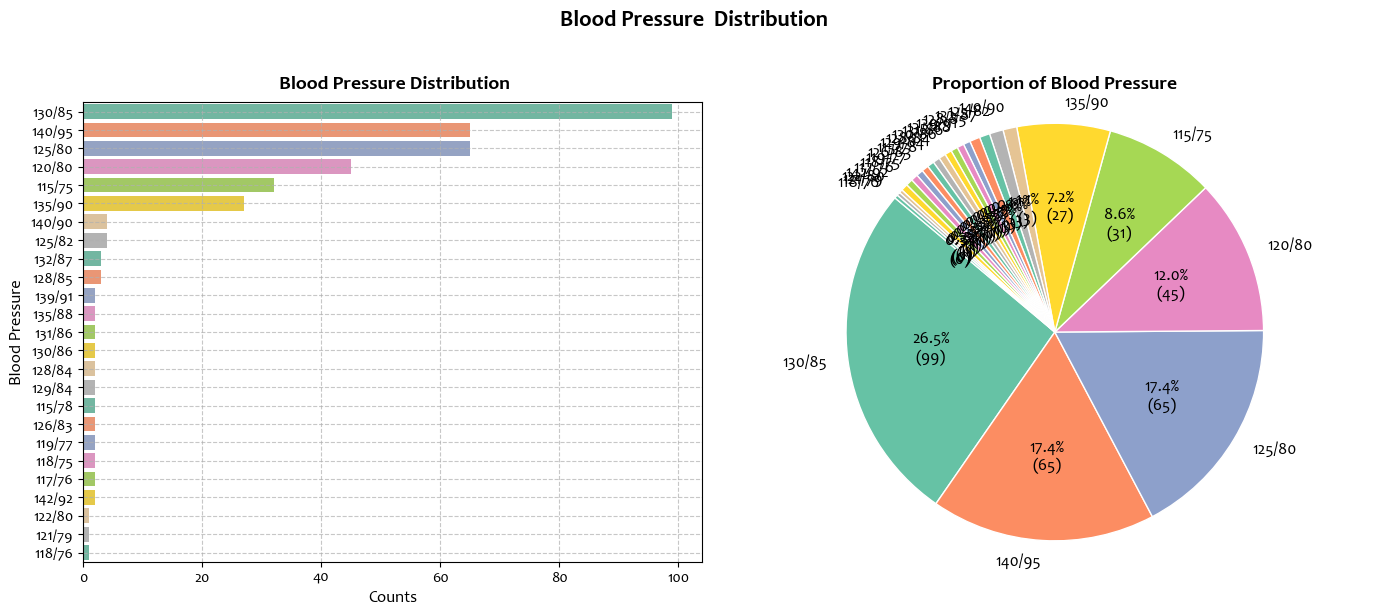

In [39]:
Cagorical_varible_distplot(df, categorical_column='Blood Pressure', title='Blood Pressure  Distribution')

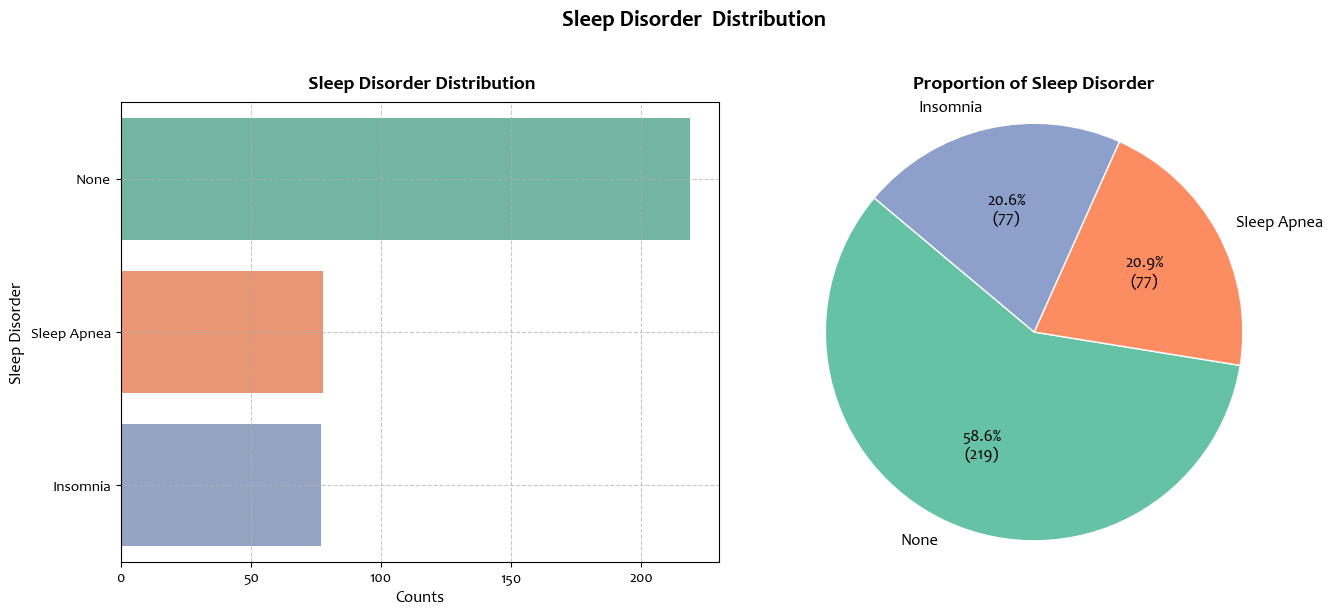

In [37]:
Cagorical_varible_distplot(df, categorical_column='Sleep Disorder', title='Sleep Disorder  Distribution')

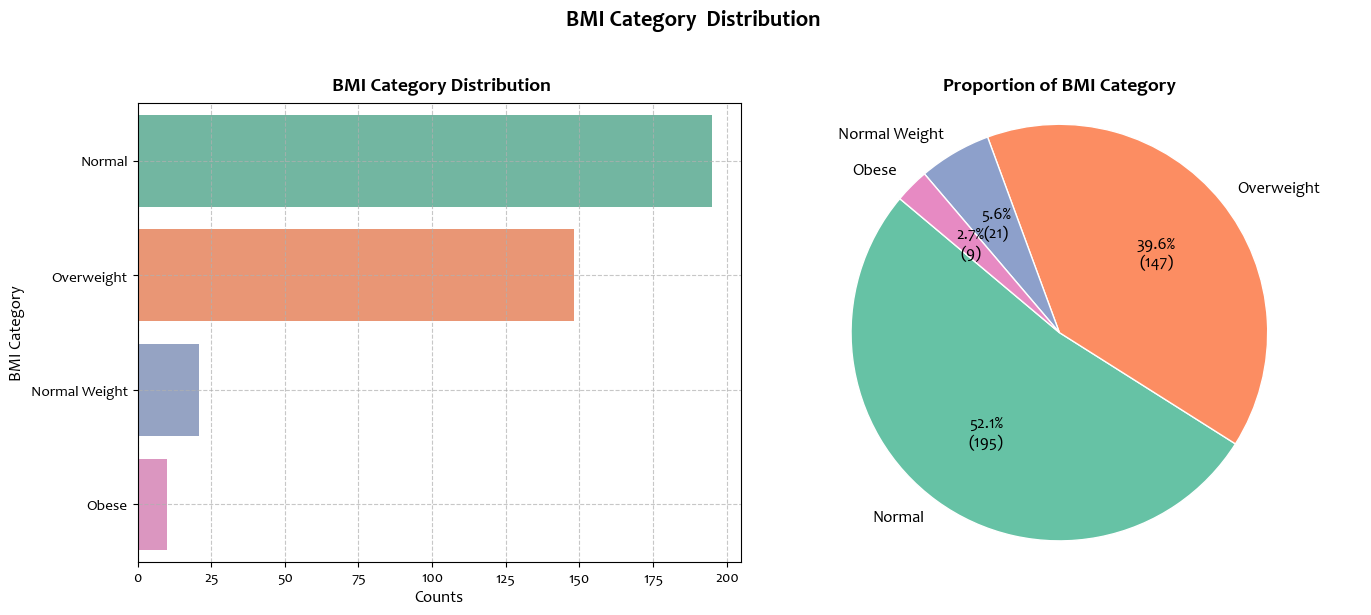

In [35]:
Cagorical_varible_distplot(df, categorical_column='BMI Category', title='BMI Category  Distribution')

<h1 style='font-size: 25px; color: Red; font-weight: 600'>5.0: Correlation Analysis (Relationship Between Variables)</h1>

In this analysis, **correlation analysis** is used to explore the relationships between variables, such as **Sleep Duration**, **Stress Level**, **Physical Activity Level**, and other relevant factors like **BMI Category** and **Occupation**. By calculating the correlation coefficient between pairs of variables, we can understand how changes in one variable might be associated with changes in another. For example, we might investigate whether there’s a negative correlation between **Physical Activity Level** and **Stress Level**, or if **Sleep Duration** is positively correlated with **Heart Rate** or **Blood Pressure**.

*A correlation value close to +1 or -1 indicates a strong positive or negative relationship, respectively, while values closer to 0 suggest weak or no correlation. This analysis helps uncover meaningful patterns in the data, guiding further exploration into how different factors interact, such as whether **occupation type** influences **sleep quality** or if **BMI** correlates with **stress levels**.*

<h4 style='font-size: 17px; color: blue; font-weight: 600'>5.1: Correlation Coefficients </h4>

In [54]:
correlation_matrix = df[Metrics].corr(method='pearson')
correlation_matrix

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps
Age,1.00,0.35,0.26,-0.27,0.15
Sleep Duration,0.35,1.00,0.27,-0.51,0.02
Physical Activity Level,0.26,0.27,1.00,-0.02,0.72
Heart Rate,-0.27,-0.51,-0.02,1.00,-0.30
Daily Steps,0.15,0.02,0.72,-0.30,1.00


<h4 style='font-size: 17px; color: blue; font-weight: 600'>5.2: Correlation Coefficients Heatmap </h4>

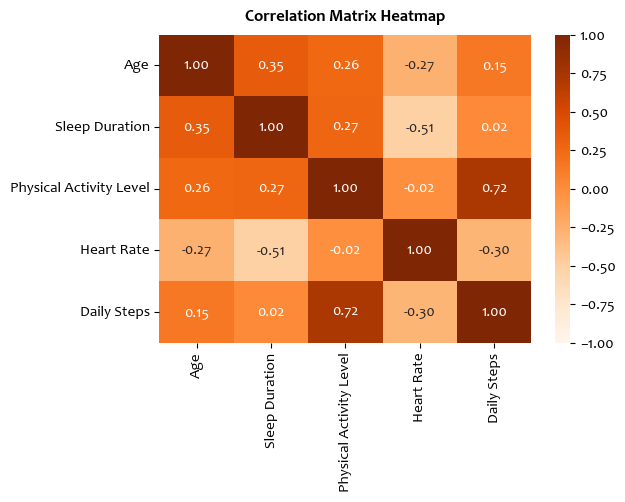

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight='bold', pad=10)
plt.grid(False)
plt.show()

<h3 style='font-size: 18px; color: blue; font-family: candara; font-weight: 600'>5.3: Pearson’s Correlation Coefficient</h3>

In the context of this analysis, **Pearson’s r** is used to measure the strength and direction of the **linear relationship** between two continuous variables. For example, we might explore how **Sleep Duration** correlates with **Stress Level**, or how **Physical Activity Level** relates to **Heart Rate**.

- **Positive Relationship**: A value closer to +1 indicates a strong positive correlation, meaning as one variable increases, the other also tends to increase. For example, a positive correlation between **Physical Activity Level** and **Heart Rate** could indicate that higher activity levels lead to higher heart rates.
  
- **Negative Relationship**: A value closer to -1 suggests a strong negative correlation, meaning as one variable increases, the other tends to decrease. For example, a negative correlation between **Stress Level** and **Sleep Duration** could indicate that higher stress levels tend to lead to shorter sleep durations.

- **No Relationship**: A value near 0 implies no linear relationship between the variables. For instance, there may be no significant correlation between **Occupation** and **Sleep Duration**, as occupation type may not directly influence how long someone sleeps.

In this analysis, Pearson’s correlation is useful for identifying linear relationships in continuous variables and provides insight into how one factor might influence another. It’s particularly valuable when exploring the impact of lifestyle factors like **Physical Activity** or **Stress** on **Sleep Quality** or **Duration**.

In [56]:
def compute_pearson_r(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

pearson_results_df = compute_pearson_r(df)
pearson_results_df.head(10)

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,Age,Sleep Duration,0.35,NaN,Positive,Moderate
1,Age,Quality of Sleep,0.49,0.00,Positive,Moderate
2,Age,Physical Activity Level,0.26,0.00,Positive,Weak
3,Age,Stress Level,-0.40,0.00,Negative,Moderate
4,Age,Heart Rate,-0.27,0.00,Negative,Weak
5,Age,Daily Steps,0.15,0.09,Positive,Weak
6,Sleep Duration,Quality of Sleep,0.87,0.00,Positive,Strong
7,Sleep Duration,Physical Activity Level,0.27,0.00,Positive,Weak
8,Sleep Duration,Stress Level,-0.83,0.00,Negative,Strong
9,Sleep Duration,Heart Rate,-0.51,0.00,Negative,Moderate


<h1 style='font-size: 25px; color: Green; font-weight: 600'>6.0: Association Analysis (Realationship Between Categorical Variables)</h1>


In this analysis, we explore the **relationships between categorical variables** like **Gender**, **BMI Category**, **Sleep Disorder**, and **Occupation** through **Association Analysis**. This approach helps uncover any dependencies or interactions between these categorical features. For example, we may want to understand how **BMI Category** correlates with the likelihood of having a **Sleep Disorder**, or if there’s any relationship between **Gender** and **Occupation** in terms of stress levels. To assess these associations, we apply two key statistical methods: 

1. **Chi-Square Test**: This test helps determine if there’s a significant relationship between two categorical variables, such as whether **Occupation** and **Sleep Disorder** are associated. It checks if the observed distribution of values is different from what we would expect by random chance.
   
2. **Cramér’s V**: While the Chi-Square test shows if an association exists, **Cramér’s V** quantifies the strength of that relationship on a scale from 0 to 1, providing a clearer picture of how strongly categories like **Stress Level** and **BMI Category** are related.

By applying these techniques, we gain a deeper understanding of how categorical variables interact within the dataset, helping to identify significant patterns that could influence further analysis or model performance.

<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>6.1. Chi-Square Test </h4>

In [232]:
def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def association_analysis(df, col1, col2, alpha=0.05):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    cramers_v_value = cramers_v(contingency_table)
    interpretation = "Significant Association" if p < alpha else "Not Significant"
    
    results = pd.DataFrame({
        'Variable 1': [col1],
        'Variable 2': [col2],
        'Chi-Square': [chi2],
        'p-value': [p],
        'Degrees of Freedom': [dof],
        'Cramér’s V': [cramers_v_value],
        'Interpretation': [interpretation]
    })
    return results


def analyze_multiple_pairs(df, categorical_vars, alpha=0.05):
    results_list = []
    for i, var1 in enumerate(categorical_vars):
        for var2 in categorical_vars[i+1:]:
            results_list.append(association_analysis(df, var1, var2, alpha))
    
    return pd.concat(results_list, ignore_index=True)

categorical_vars = df.select_dtypes(include=['object']).columns
results_df = analyze_multiple_pairs(df, categorical_vars)
results_df = results_df[results_df['Variable 1'] == 'Occupation']
results_df

,Variable 1,Variable 2,Chi-Square,p-value,Degrees of Freedom,Cramér’s V,Interpretation
4,Occupation,BMI Category,405.51,0.00,30,0.60,Significant Association
5,Occupation,Blood Pressure,1941.10,0.00,240,0.72,Significant Association
6,Occupation,Sleep Disorder,421.36,0.00,20,0.75,Significant Association


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>6.2. Standardized Residuals</h4>

Standardized residuals in a **Chi-Square test** provide a deeper understanding of how observed data compares to expected data, helping to pinpoint areas where categorical variables significantly differ from what would be expected under the assumption of independence. In a Chi-Square test of independence, we compare observed counts to expected counts, and the residuals (the differences between these counts) are standardized to account for variability in the data. Standardized residuals allow us to determine which specific cells in a contingency table are contributing most to the overall Chi-Square statistic. Residuals greater than 2 or less than -2 often indicate significant differences, with values beyond 3 suggesting a highly significant discrepancy. Positive residuals indicate observed counts higher than expected, while negative residuals suggest observed counts are lower than expected.

The real-world implications of standardized residuals in this study on sleep disorders reveal which occupations are most strongly linked to specific sleep-related issues. For example, occupations such as nurses and salespeople show significantly higher-than-expected occurrences of sleep apnea and insomnia, suggesting the need for targeted interventions or wellness programs in these fields. Conversely, occupations like teachers and engineers demonstrate lower-than-expected rates of sleep disorders, which may indicate the effectiveness of existing stress-relief measures or naturally lower stress levels in those roles. These insights can guide workplace health strategies and inform policies to improve sleep health across different occupations.

By identifying such patterns, standardized residuals offer more granular insights than the Chi-Square statistic alone, highlighting where relationships between variables are particularly strong or weak. This can guide policy decisions, product development, or organizational strategies. For example, a company looking to improve employee wellness could use such insights to tailor stress management programs to specific occupations that are at higher risk. Thus, standardized residuals are a valuable tool for uncovering hidden relationships in data, allowing organizations to focus their efforts where they will have the most impact.

In [219]:
def calculate_standardized_residuals(df, target_var, explanatory_vars): 
    results = []
    for exp_var in explanatory_vars:
        contingency_table = pd.crosstab(df[target_var], df[exp_var])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        observed = contingency_table.values
        expected = expected
        standardized_residuals = (observed - expected) / np.sqrt(expected)
        for i, target_category in enumerate(contingency_table.index):
            for j, exp_category in enumerate(contingency_table.columns):
                results.append({
                    'Target variable': target_var,
                    'Explanatory Variable': exp_var,
                    'Target Category': target_category,
                    'Explanatory Category': exp_category,
                    'Observed': observed[i, j],
                    'Expected': expected[i, j],
                    'Standardized Residual': standardized_residuals[i, j]
                })
    
    return pd.DataFrame(results)


target_var = "Occupation" 
explanatory_vars = ["Sleep Disorder"] 
results = calculate_standardized_residuals(df, target_var, explanatory_vars) 
display(results)

,Target variable,Explanatory Variable,Target Category,Explanatory Category,Observed,Expected,Standardized Residual
0,Occupation,Sleep Disorder,Accountant,Insomnia,7,7.62,-0.22
1,Occupation,Sleep Disorder,Accountant,None,30,21.67,1.79
2,Occupation,Sleep Disorder,Accountant,Sleep Apnea,0,7.72,-2.78
3,Occupation,Sleep Disorder,Doctor,Insomnia,3,14.62,-3.04
4,Occupation,Sleep Disorder,Doctor,None,64,41.57,3.48
5,Occupation,Sleep Disorder,Doctor,Sleep Apnea,4,14.81,-2.81
6,Occupation,Sleep Disorder,Engineer,Insomnia,5,12.97,-2.21
7,Occupation,Sleep Disorder,Engineer,None,57,36.89,3.31
8,Occupation,Sleep Disorder,Engineer,Sleep Apnea,1,13.14,-3.35
9,Occupation,Sleep Disorder,Lawyer,Insomnia,2,9.68,-2.47


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>6.1. Cramér's V and Phi coefficient.</h4>

Cramér's V and the Phi coefficient are both statistical measures used to assess the strength of association between categorical variables, but they are applied in different contexts. Cramér's V is a more generalized version of the Phi coefficient, suitable for contingency tables larger than 2x2. It provides a normalized measure of association, ranging from 0 (no association) to 1 (perfect association). For example, in a study examining the relationship between job occupation and sleep disorder, Cramér's V can quantify how strongly these two variables are related, regardless of how many categories are present in each variable. On the other hand, the Phi coefficient is specifically used for 2x2 tables, such as when assessing the relationship between two binary variables, like whether or not someone has a sleep disorder based on a specific occupation. Both metrics help determine the strength of associations but are chosen based on the structure of the data.

In [152]:
def compute_pairwise_effect_sizes(df: pd.DataFrame, filter_var: Optional[str] = None, sort_by: str = 'cramers_v') -> pd.DataFrame:
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    results = []
    effect_size_thresholds = {
        'Negligible': 0.1, 'Small': 0.3,
        'Medium': 0.5,
        'Large': float('inf')
    }
    
    def compute_cramers_v(contingency_table: pd.DataFrame) -> float:
        chi2 = stats.chi2_contingency(contingency_table)[0]
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0.0
    
    def compute_phi_coefficient(contingency_table: pd.DataFrame) -> Optional[float]:
        if contingency_table.shape == (2, 2):
            chi2 = stats.chi2_contingency(contingency_table, correction=False)[0]
            n = contingency_table.sum().sum()
            return np.sqrt(chi2 / n)
        return None
    
    def interpret_effect_size(value: float) -> str:
        for interpretation, threshold in effect_size_thresholds.items():
            if value < threshold:
                return interpretation
        return 'Large'
    
    for var1, var2 in combinations(categorical_vars, 2):
        if filter_var and filter_var not in (var1, var2):
            continue

        contingency_table = pd.crosstab(df[var1], df[var2])
        cramers_v = compute_cramers_v(contingency_table)
        phi = compute_phi_coefficient(contingency_table)
        
        results.append({
            'variable1': var1,
            'variable2': var2,
            'cramers_v': cramers_v,
            'phi_coefficient': phi,
            'interpretation': interpret_effect_size(cramers_v)
        })
    
    result_df = pd.DataFrame(results)
    
    if sort_by in result_df.columns:
        result_df = result_df.sort_values(by=sort_by, ascending=False)
    
    return result_df.reset_index(drop=True)

effect_size_results = compute_pairwise_effect_sizes(df, filter_var='Occupation')
effect_size_results

,variable1,variable2,cramers_v,phi_coefficient,interpretation
0,Gender,Occupation,0.86,None,Large
1,Occupation,Sleep Disorder,0.75,None,Large
2,Occupation,Blood Pressure,0.72,None,Large
3,Occupation,BMI Category,0.60,None,Large


<h1 style='font-size: 25px; color: Blue; font-weight: 600'>7.1: Association and Relationships between Job Occupations and Sleeping Disorders</h1>

- To explore the association and relationships between job occupations and sleeping disorders, we will focus on one disorder at a time, such as insomnia or sleep apnea, to examine how job occupation correlates with the likelihood of having the disorder. In this analysis, we will treat **Accountants** as the baseline occupation, comparing the likelihood of having the selected sleeping disorder in other occupations against the baseline. Accountants are chosen because their job is often perceived as relatively standard, typically following a 9-5 schedule, which may offer a consistent point of comparison for other professions that could have varying levels of stress, irregular hours, or physical demands that might influence sleep patterns.

- We will use **logistic regression** to model the relationship, with the presence or absence of the sleeping disorder as the dependent variable (coded as 1 for present and 0 for absent) and job occupation as the independent variable. Occupations will be treated as categorical predictors, including roles like Accountants, Engineers, Doctors, Teachers, and others. The logistic regression model will allow us to calculate **odds ratios (OR)**, which tell us how the likelihood of having the disorder in each occupation compares to the baseline occupation, Accountants. An odds ratio of 1 indicates that the odds of having the disorder are the same for a given occupation as they are for Accountants. An OR greater than 1 suggests that the occupation is more likely to have the disorder compared to Accountants, while an OR less than 1 suggests the occupation is less likely to experience the disorder.

- The interpretation of the results will focus on the **statistical significance** of the odds ratios, with significant differences (based on p-values) indicating that a particular occupation has a noteworthy effect on the likelihood of having the sleeping disorder. Additionally, the magnitude of the odds ratio will provide insights into how strong the association is between job occupation and the disorder. Through this analysis, we can assess which occupations are more or less prone to sleeping disorders in comparison to Accountants, providing valuable insights into the relationship between work environments and sleep health.

In [233]:
def logistic_regression_by_disorder(data, Disorder, Factor, target_disorder, baseline_occupation=None, additional_predictors=None):
    df = data.copy()
    df['Disorder_Binary'] = (df[Disorder] == target_disorder).astype(int)

    occupations = df[Factor].unique()
    if baseline_occupation and baseline_occupation in occupations:
        occupations = [occ for occ in occupations if occ != baseline_occupation]
    
    for occ in occupations:
        df[f'{occ}'] = (df[Factor] == occ).astype(int)
    
    X_columns = [f'{occ}' for occ in occupations]
    if additional_predictors:
        X_columns += additional_predictors
    
    X = df[X_columns]
    X = sm.add_constant(X)
    y = df['Disorder_Binary']
    
    try:
        model = sm.Logit(y, X).fit(disp=0)
    except np.linalg.LinAlgError:
        print("Singular matrix: Using L1 regularization")
        model = sm.Logit(y, X).fit_regularized(method='l1', alpha=0.1, disp=0)
    
    odds_ratios = pd.DataFrame({ 'Predictor': model.params.index, 
                                'Odds Ratio': np.exp(model.params), 
                                'P_value': model.pvalues})
    
    return model, odds_ratios

<h4 style='font-size: 17px; color: Blue; font-weight: 600'>7.1:  Job Occupations Vs Sleeping Disorders (Insomnia)</h4>

In [234]:
data = df.copy()
Disorder = "Sleep Disorder"
Factor = "Occupation"
target_disorder = "Insomnia"
baseline = "Accountant"
#additional_vars = ["Age", "Stress Level"]  # Optional control variables

model, odds = logistic_regression_by_disorder(
    data, 
    Disorder, Factor,
    target_disorder, 
    baseline_occupation=baseline,
    #additional_predictors=additional_vars
)

print(model.summary())

#print(f"{' '*12} Odds Ratios vs Baseline ('{}'):".format(baseline))
odds = odds.sort_values('Odds Ratio', ascending=False)
odds = odds[odds['Predictor'] != 'const']
display(odds)

                           Logit Regression Results                           
Dep. Variable:        Disorder_Binary   No. Observations:                  374
Model:                          Logit   Df Residuals:                      363
Method:                           MLE   Df Model:                           10
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.4423
Time:                        14:49:34   Log-Likelihood:                -106.05
converged:                      False   LL-Null:                       -190.16
Covariance Type:            nonrobust   LLR p-value:                 6.490e-31
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4553      0.420     -3.467      0.001      -2.278      -0.633
Nurse                   -1.6946      0.724     -2.341      0.019      -3.113      -0.276
Doctor      

,Predictor,Odds Ratio,P_value
Salesperson,Salesperson,41.43,0.00
Teacher,Teacher,8.90,0.00
Software Engineer,Software Engineer,1.43,0.77
Engineer,Engineer,0.37,0.11
Lawyer,Lawyer,0.19,0.05
Doctor,Doctor,0.19,0.02
Nurse,Nurse,0.18,0.02
Scientist,Scientist,0.00,1.00
Sales Representative,Sales Representative,0.00,1.00
Manager,Manager,0.00,1.00


<h4 style='font-size: 17px; color: Blue; font-weight: 600'>7.2:  Job Occupations Vs Sleeping Disorders (Sleep Apnea)</h4>

In [235]:
data = df.copy()
Disorder = "Sleep Disorder"
Factor = "Occupation"
target_disorder = "Sleep Apnea"
baseline = "Accountant"
#additional_vars = ["Age", "Stress Level"]  # Optional control variables

model, odds = logistic_regression_by_disorder(
    data, 
    Disorder, Factor,
    target_disorder, 
    baseline_occupation=baseline,
    #additional_predictors=additional_vars
)

print(model.summary())

#print(f"{' '*12} Odds Ratios vs Baseline ('{}'):".format(baseline))
odds = odds.sort_values('Odds Ratio', ascending=False)
odds = odds[odds['Predictor'] != 'const']
display(odds)

Singular matrix: Using L1 regularization
                           Logit Regression Results                           
Dep. Variable:        Disorder_Binary   No. Observations:                  374
Model:                          Logit   Df Residuals:                      366
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.5542
Time:                        14:49:37   Log-Likelihood:                -85.377
converged:                       True   LL-Null:                       -191.50
Covariance Type:            nonrobust   LLR p-value:                 2.910e-42
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0489      0.752     -5.385      0.000      -5.522      -2.575
Nurse                    5.6649      0.815      6.950      0

,Predictor,Odds Ratio,P_value
Sales Representative,Sales Representative,1089.18,0.04
Nurse,Nurse,288.57,0.00
Scientist,Scientist,51.87,0.00
Teacher,Teacher,6.19,0.05
Lawyer,Lawyer,3.77,0.17
Doctor,Doctor,3.33,0.19
Salesperson,Salesperson,1.66,0.70
Engineer,Engineer,1.00,NaN
Manager,Manager,1.00,NaN
Software Engineer,Software Engineer,1.00,NaN


<h4 style='font-size: 17px; color: Blue; font-weight: 600'>7.4:  Job Occupations Vs Sleeping Disorders (Note have)</h4>

In [236]:
data = df.copy()
Disorder = "Sleep Disorder"
Factor = "Occupation"
target_disorder = "None"
baseline = "Accountant"
#additional_vars = ["Age", "Stress Level"]  # Optional control variables

model, odds = logistic_regression_by_disorder(
    data, 
    Disorder, Factor,
    target_disorder, 
    baseline_occupation=baseline,
    #additional_predictors=additional_vars
)

print(model.summary())

#print(f"{' '*12} Odds Ratios vs Baseline ('{}'):".format(baseline))
odds = odds.sort_values('Odds Ratio', ascending=False)
odds = odds[odds['Predictor'] != 'const']
display(odds)

Singular matrix: Using L1 regularization
                           Logit Regression Results                           
Dep. Variable:        Disorder_Binary   No. Observations:                  374
Model:                          Logit   Df Residuals:                      363
Method:                           MLE   Df Model:                           10
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.4566
Time:                        14:49:40   Log-Likelihood:                -137.87
converged:                       True   LL-Null:                       -253.73
Covariance Type:            nonrobust   LLR p-value:                 3.736e-44
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4033      0.413      3.397      0.001       0.594       2.213
Nurse                   -3.3523      0.544     -6.160      0

,Predictor,Odds Ratio,P_value
Engineer,Engineer,2.29,0.16
Manager,Manager,2.21,0.81
Doctor,Doctor,2.21,0.17
Lawyer,Lawyer,2.02,0.26
Software Engineer,Software Engineer,0.85,0.90
Scientist,Scientist,0.27,0.23
Teacher,Teacher,0.07,0.00
Nurse,Nurse,0.04,0.00
Salesperson,Salesperson,0.02,0.00
Sales Representative,Sales Representative,0.01,0.18


*You can extend this analysis by exploring additional **categorical variables** and choosing different **baselines** for comparison. For instance, in addition to job occupations, you could include other factors such as **age**, **gender**, as categorical variables to see how they relate to sleeping disorders. Similarly, you can select different occupations or even broader categories as baselines to compare against others.*

*Moreover, you can analyze different types of sleeping disorders beyond insomnia or sleep apnea, such as **Insomnia**, and apply the same logistic regression model to examine how various occupations or other factors influence the likelihood of having these disorders. By testing multiple baselines, occupations, and disorders, you can uncover more nuanced insights into how different variables are associated with sleep health.*

<h1 style='font-size: 25px; color: Blue; font-weight: 600'>8.0:Relationships between Job Occupations and Stress levels</h1>

To explore how job occupations relate to stress levels, we will use **linear regression** to model the relationship between occupation and stress. In this analysis, **stress level** will be treated as a continuous dependent variable, measured using a stress scale or other quantifiable indicators. The primary independent variable will be **job occupation**, with **Accountants** serving as the baseline occupation for comparison. This approach will allow us to examine how stress levels in various occupations compare to those of Accountants. The linear regression model will have stress level as the dependent variable and job occupation as the categorical independent variable. By using Accountants as the baseline, the model will generate **coefficients** that represent the difference in stress levels between each occupation and the baseline. For example, if the coefficient for Engineers is **2**, it indicates that Engineers, on average, report a stress level that is **2 units higher** than Accountants. Similarly, if the coefficient for Teachers is **-1.5**, it means Teachers report a stress level that is **1.5 units lower** than Accountants, assuming the stress level is measured on a numeric scale.

In addition to interpreting the coefficients, we will assess the **statistical significance** of each coefficient using p-values. A p-value less than 0.05 would suggest a statistically significant difference in stress levels between the occupation in question and the baseline. The magnitude of the coefficients will also provide insight into the strength of the association between occupation and stress, with larger coefficients indicating a stronger relationship. This analysis will help identify which occupations are more or less associated with higher stress levels compared to the baseline of Accountants.

In [238]:
def regression_analysis(data, Variables, Factor):
    results = []
    for dependent_var in Variables:
        column_name = rename(dependent_var)
        data = data.rename(columns={dependent_var: column_name})
        formula = f"{column_name} ~ {Factor}"
        model = ols(formula, data=data).fit()
        for index, row in model.summary2().tables[1].iterrows():
            results.append({
                "Dependent Variable": dependent_var,
                "Factor": index,
                "Coef.": row["Coef."],
                "Std.Err.": row["Std.Err."],
                "t": row["t"],
                "p-value": row["P>|t|"],
                "95% CI Lower": row["[0.025"],
                "95% CI Upper": row["0.975]"]
            })
    
    return pd.DataFrame(results)

dependent_vars = ['Stress Level']
regression_results_df = regression_analysis(df, dependent_vars, "Occupation")
regression_results_df.head(30)

,Dependent Variable,Factor,Coef.,Std.Err.,t,p-value,95% CI Lower,95% CI Upper
0,Stress Level,Intercept,4.59,0.23,19.63,0.00,4.13,5.05
1,Stress Level,Occupation[T.Doctor],2.14,0.29,7.40,0.00,1.57,2.71
2,Stress Level,Occupation[T.Engineer],-0.71,0.29,-2.39,0.02,-1.29,-0.13
3,Stress Level,Occupation[T.Lawyer],0.47,0.31,1.50,0.13,-0.15,1.08
4,Stress Level,Occupation[T.Manager],0.41,1.44,0.28,0.78,-2.43,3.24
5,Stress Level,Occupation[T.Nurse],0.95,0.29,3.32,0.00,0.39,1.52
6,Stress Level,Occupation[T.Sales Representative],3.41,1.03,3.29,0.00,1.37,5.44
7,Stress Level,Occupation[T.Salesperson],2.41,0.34,7.00,0.00,1.73,3.08
8,Stress Level,Occupation[T.Scientist],2.41,0.75,3.21,0.00,0.93,3.88
9,Stress Level,Occupation[T.Software Engineer],1.41,0.75,1.88,0.06,-0.07,2.88


Now, we can expand the analysis to explore how **job occupation** relates to a variety of other variables of interest, helping us understand the broader impact of occupation on different aspects. These variables can include **'Physical Activity Level'**, **Sleep Duration**, **Daily Steps**, and other factors that might be influenced by the type of work someone does. For each variable, we can apply appropriate statistical models to assess the relationship between job occupation and the outcome of interest. For instance, for continuous variables like **Sleep Duration** or **Physical Activity Level**, we can continue using **linear regression** to interpret the coefficients and examine how job occupation affects these outcomes. Similarly, for binary outcomes like **sleeping disorders**, we can use **logistic regression** to understand how the odds of experiencing a disorder compare across different occupations, using a baseline occupation for comparison.

By applying these techniques to various variables, we can gain a comprehensive understanding of how job occupations are related to multiple dimensions of health and well-being. For each variable, interpreting the coefficients and examining statistical significance will help us identify which occupations are associated with higher or lower levels of certain outcomes, such as stress, health risks, or job satisfaction. This holistic analysis can provide valuable insights for improving workplace well-being, designing healthier work environments, and making informed decisions about occupational health interventions.

In [240]:
dependent_vars = ['Sleep Duration', 'Physical Activity Level', 'Daily Steps']
regression_results_df = regression_analysis(df, dependent_vars, "Occupation")
regression_results_df.head(30)

,Dependent Variable,Factor,Coef.,Std.Err.,t,p-value,95% CI Lower,95% CI Upper
0,Sleep Duration,Intercept,7.11,0.11,67.18,0.00,6.91,7.32
1,Sleep Duration,Occupation[T.Doctor],-0.14,0.13,-1.10,0.27,-0.40,0.11
2,Sleep Duration,Occupation[T.Engineer],0.87,0.13,6.55,0.00,0.61,1.14
3,Sleep Duration,Occupation[T.Lawyer],0.30,0.14,2.10,0.04,0.02,0.58
4,Sleep Duration,Occupation[T.Manager],-0.21,0.65,-0.33,0.74,-1.50,1.07
5,Sleep Duration,Occupation[T.Nurse],-0.05,0.13,-0.39,0.70,-0.31,0.21
6,Sleep Duration,Occupation[T.Sales Representative],-1.21,0.47,-2.60,0.01,-2.13,-0.29
7,Sleep Duration,Occupation[T.Salesperson],-0.71,0.16,-4.57,0.00,-1.02,-0.40
8,Sleep Duration,Occupation[T.Scientist],-1.11,0.34,-3.28,0.00,-1.78,-0.45
9,Sleep Duration,Occupation[T.Software Engineer],-0.36,0.34,-1.07,0.28,-1.03,0.30


<h4 style='font-size: 17px; color: Blue; font-weight: 600'>8.3: Interaction Effects</h4>

Additionally, we can explore how **two or more independent variables** interact and influence targeted continuous variables, providing a deeper understanding of the relationships between occupation and other factors. In this context, independent variables could include **job occupation**, **age**, **gender**, **work environment**, or even **educational background**, while the continuous target variables could be things like **stress level**, **job satisfaction**, or **sleep quality**.

To examine these interactions, we can use statistical techniques that allow us to explore **interaction effects**. For example, in a **multiple linear regression** model, we can include interaction terms between job occupation and other variables (like age or work environment) to see if the relationship between occupation and a target variable like stress level changes depending on the values of the other independent variables. This will help us understand whether, for example, the effect of a job on stress is different for younger versus older employees, or if the impact of occupation on health is stronger in certain work environments.

By modeling these interactions, we can uncover more nuanced insights. For example, we might find that **job occupation** alone might not fully explain stress levels, but when combined with **work environment** or **age**, the effect becomes more pronounced. These insights can help us identify specific factors or combinations of factors that contribute most significantly to outcomes like stress or job satisfaction, which can then inform targeted interventions or policy changes.

In [229]:
def regression_analysis(data, dependent_columns, factor1, factor2):
    results = []
    for dependent_var in dependent_columns:
        
        column_name = rename(dependent_var)
        data = data.rename(columns={dependent_var: column_name})
        
        formula = f"{column_name} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})"
        model = ols(formula, data=data).fit()
        
        for index, row in model.summary2().tables[1].iterrows():
            results.append({
                "Dependent Variable": dependent_var,
                "Factor": index,
                "Coef.": row["Coef."],
                "Std.Err.": row["Std.Err."],
                "t": row["t"],
                "p-value": row["P>|t|"],
                "95% CI Lower": row["[0.025"],
                "95% CI Upper": row["0.975]"]
            })
    
    return pd.DataFrame(results)

dependent_vars = ['Stress Level']
regression_results_df = regression_analysis(df, dependent_vars, "Occupation", "Gender")
regression_results_df.head(30)

,Dependent Variable,Factor,Coef.,Std.Err.,t,p-value,95% CI Lower,95% CI Upper
0,Stress Level,Intercept,4.56,0.22,20.48,0.00,4.12,4.99
1,Stress Level,C(Occupation)[T.Doctor],-1.56,0.97,-1.60,0.11,-3.46,0.35
2,Stress Level,C(Occupation)[T.Engineer],-1.56,0.32,-4.80,0.00,-2.19,-0.92
3,Stress Level,C(Occupation)[T.Lawyer],0.94,0.97,0.97,0.33,-0.96,2.85
4,Stress Level,C(Occupation)[T.Manager],0.44,1.35,0.33,0.74,-2.22,3.10
5,Stress Level,C(Occupation)[T.Nurse],0.99,0.27,3.65,0.00,0.46,1.53
6,Stress Level,C(Occupation)[T.Sales Representative],1.00,0.82,1.22,0.22,-0.61,2.61
7,Stress Level,C(Occupation)[T.Salesperson],0.50,0.68,0.74,0.46,-0.83,1.83
8,Stress Level,C(Occupation)[T.Scientist],2.44,0.70,3.48,0.00,1.06,3.83
9,Stress Level,C(Occupation)[T.Software Engineer],0.00,0.75,0.00,1.00,-1.47,1.47


---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions.

---

<h5 style='font-size: 65px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>